
# ParticleData Module Usage

This guide demonstrates how to use the `ParticleData` module from the `tsitools` package.

## Installation

You can install the `tsitools` package using pip:


In [ ]:
!pip install tsitools

## Importing the Module

First, import the `ParticleData` class from the `tsitools` package.

In [4]:
from tsitools import ParticleData

## Reading Data

The `ParticleData` module accepts either the numerical suffix at the end of the file name or the full file name to locate the file within the specified directory.

### Examples for Reading Files

Assume the file `2024_01_27-19_02_15-TEST_123.csv` is in the current directory.

#### Using the Numerical Suffix

You can initialize the `ParticleData` object using the numerical suffix at the end of the file name:

In [5]:
data = ParticleData(directory='./', suffix=123)
data = ParticleData(directory='./', suffix='123')

#### Using the Full File Name

You can also initialize the `ParticleData` object using the full file name with or without the `.csv` extension:

In [6]:
data = ParticleData(directory='./', suffix='123.csv')
data = ParticleData(directory='./', suffix='2024_01_27-19_02_15-TEST_123.csv')

## Specifying the Cut-off for the Oversize Bin

If the cut-off for the oversize bin is not specified, it defaults to 16.6 microns. You can specify a different cut-off if needed:

In [7]:
data = ParticleData(directory='./', suffix=123, oversize_bin_cutoff=16.6)


## Examples and Explanations

### data.counts

**Explanation**: This property returns a 2D numpy array containing the counts of particles for each bin over time.

**Example**:

In [9]:
from pprint import pprint

counts = data.counts
pprint(counts)

array([[330., 303., 274., 219., 157., 236., 118., 188., 224., 160., 128.,
        126., 113., 126., 100.,  50.,   9.],
       [263., 294., 166., 175., 138., 184., 105., 168., 156., 139., 121.,
        118.,  74.,  85.,  50.,  25.,   4.],
       [180., 230., 196., 172.,  96., 132.,  76., 132., 113.,  84.,  87.,
         58.,  96.,  56.,  36.,  13.,   3.],
       [152., 172., 135., 101.,  83., 109.,  50.,  94.,  79.,  84.,  56.,
         61.,  42.,  37.,  18.,  11.,   0.],
       [140., 159.,  95.,  89.,  64., 108.,  41.,  65.,  94.,  71.,  49.,
         47.,  34.,  20.,  12.,   0.,   1.],
       [119., 126.,  97.,  77.,  51.,  71.,  43.,  58.,  66.,  42.,  36.,
         31.,  24.,  16.,   6.,   0.,   1.]])


### data.dlogD

**Explanation**: This property returns a numpy array containing the logarithmic difference (dlogD) between consecutive bin cutoffs.

**Example**:

In [10]:
dlogD = data.dlogD
print(dlogD)

[0.09575035 0.09458135 0.09522561 0.0952567  0.09485718 0.09526073
 0.09527396 0.09522076 0.09510087 0.09529553 0.09519209 0.0951657
 0.09519533 0.09512963 0.09514258 0.09523037 0.22010809]


### data.total_volume

**Explanation**: This property returns the total volume of particles over all time points and bins, measured in femto liters.

**Example**:

In [11]:
total_volume = round(data.total_volume,0)
print(f"total particle volume in femto liters: {total_volume}")

total particle volume in femto liters: 188663.0


### data.total_count

**Explanation**: This property returns the total count of particles over all time points and bins.

**Example**:

In [12]:
total_count = data.total_count
print(f"total particle countL {total_volume}")

total particle countL 188663.0


### data.get_count_over_time(bin_num: Optional[int] = None) -> np.ndarray

**Explanation**: This method returns the particle count over time for a specific bin, or for all bins combined if no bin number is specified.

**Example**: For data collected every minute over a period of 6 minutes.


In [13]:
count_over_time = data.get_count_over_time()
print(count_over_time)

count_over_time_bin_1 = data.get_count_over_time(bin_num=1)
print(count_over_time_bin_1)

[2861. 2265. 1760. 1284. 1089.  864.]
[303. 294. 230. 172. 159. 126.]


### data.get_volume_over_time(bin_num: Optional[int] = None) -> np.ndarray

**Explanation**: This method returns the volume of particles over time for a specific bin or for all bins combined if no bin number is specified, measured in femto liters.

**Example**: For data collected every minute over a period of 6 minutes.

In [14]:
import numpy as np

volume_over_time = data.get_volume_over_time()
volume_over_time = np.array([round(value,0) for value in volume_over_time])
print(volume_over_time)

volume_over_time_bin_1 = data.get_volume_over_time(bin_num=1)
volume_over_time_bin_1 = np.array([round(value,2) for value in volume_over_time_bin_1])
print(volume_over_time_bin_1)

[77273. 44434. 31137. 17626. 10661.  7532.]
[11.71 11.36  8.89  6.65  6.15  4.87]


### data.header

**Explanation**: This property returns a dictionary containing the header key-value pairs parsed from the CSV file.

**Example**:

In [15]:
from pprint import pprint

header = data.header
pprint(header)


{'Alarm': '0.000 #/cm3',
 'Bin 1 Cut Point (um)': '0.300',
 'Bin 10 Cut Point (um)': '2.156',
 'Bin 11 Cut Point (um)': '2.685',
 'Bin 12 Cut Point (um)': '3.343',
 'Bin 13 Cut Point (um)': '4.162',
 'Bin 14 Cut Point (um)': '5.182',
 'Bin 15 Cut Point (um)': '6.451',
 'Bin 16 Cut Point (um)': '8.031',
 'Bin 17 Cut Point (um)': '10.000',
 'Bin 2 Cut Point (um)': '0.374',
 'Bin 3 Cut Point (um)': '0.465',
 'Bin 4 Cut Point (um)': '0.579',
 'Bin 5 Cut Point (um)': '0.721',
 'Bin 6 Cut Point (um)': '0.897',
 'Bin 7 Cut Point (um)': '1.117',
 'Bin 8 Cut Point (um)': '1.391',
 'Bin 9 Cut Point (um)': '1.732',
 'Calibration Date': '2021/02/02',
 'DeadTime Correction Factor': '1.000',
 'Density': '1.000',
 'Errors': '',
 'Firmware Version': '1.4',
 'FlowCal': '1.000',
 'Instrument Name': 'Optical Particle Sizer',
 'Model Number': '3330',
 'Number Channels Enabled': '16',
 'Number of Samples': '6',
 'Protocol Name_Number': 'TEST_123',
 'Refractive Index': '0.000-0.000j',
 'Sample Interval [H:M

### data.data

**Explanation**: This property returns a pandas DataFrame containing the parsed data from the CSV file.

**Example**:


In [46]:
df = data.data
print(df)

   Elapsed Time [s]  Bin 1  Bin 2  Bin 3  ...  Ambient Pressure (kPa)  Alarms  Errors  Unnamed: 24
0                60    330    303    274  ...                 101.135     NaN     NaN          NaN
1               120    263    294    166  ...                 101.137     NaN     NaN          NaN
2               180    180    230    196  ...                 101.137     NaN     NaN          NaN
3               240    152    172    135  ...                 101.140     NaN     NaN          NaN
4               300    140    159     95  ...                 101.139     NaN     NaN          NaN
5               360    119    126     97  ...                 101.145     NaN     NaN          NaN

[6 rows x 25 columns]


### data.bin_cutoffs

**Explanation**: This property returns a numpy array of bin cutoffs as floats.

**Example**:

In [47]:
bin_cutoffs = data.bin_cutoffs
print(bin_cutoffs)

[ 0.3    0.374  0.465  0.579  0.721  0.897  1.117  1.391  1.732  2.156
  2.685  3.343  4.162  5.182  6.451  8.031 10.    16.6  ]


### data.mean_diameters

**Explanation**: This property returns a numpy array of mean diameters for each bin based on the bin cutoffs, measured in microns.

**Example**:

In [48]:
mean_diameters = data.mean_diameters
print(mean_diameters)

[ 0.337   0.4195  0.522   0.65    0.809   1.007   1.254   1.5615  1.944
  2.4205  3.014   3.7525  4.672   5.8165  7.241   9.0155 13.3   ]


### data.time_points

**Explanation**: This property returns a numpy array of time points from the data.

**Example**:

In [49]:
time_points = data.time_points
print(time_points)

[ 60 120 180 240 300 360]


### data.bin_volumes

**Explanation**: This property returns a numpy array of volumes per particle for each bin, measured in femto liters.

**Example**:

In [50]:
bin_volumes = data.bin_volumes
print(bin_volumes)

[2.00395666e-02 3.86540067e-02 7.44749347e-02 1.43793314e-01
 2.77232529e-01 5.34671499e-01 1.03250279e+00 1.99353832e+00
 3.84669191e+00 7.42529792e+00 1.43360123e+01 2.76669143e+01
 5.33958033e+01 1.03034773e+02 1.98789877e+02 3.83679041e+02
 1.23183785e+03]


## Plotting Examples



### Particle Counts

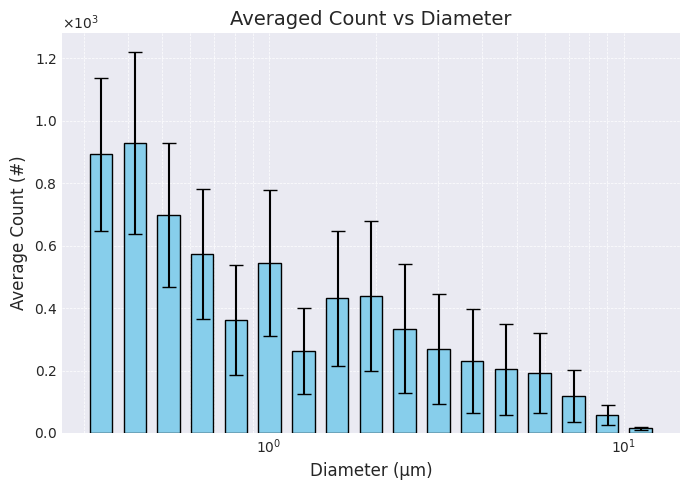

In [72]:
from tsitools import ParticleData
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

# Apply seaborn style
sns.set_style('darkgrid')

# Read the data
data1 = ParticleData(directory='./', suffix='123', oversize_bin_cutoff=12.4)
data2 = ParticleData(directory='./', suffix='124', oversize_bin_cutoff=12.4)
data3 = ParticleData(directory='./', suffix='125', oversize_bin_cutoff=12.4)

# Stack the arrays along a new dimension
stacked_sums = np.stack((data1.sum_counts, data2.sum_counts, data3.sum_counts), axis=0)

# Calculate the mean along the new dimension
average_sums = np.mean(stacked_sums, axis=0)

# Calculate the standard deviation along the new dimension
std_sums = np.std(stacked_sums, axis=0)

# Convert the width from log scale to linear scale for each bar center
widths = data1.calculate_bar_plot_widths(log_base=10, bar_width=0.25)

# Create a bar plot with adjusted widths and error bars
plt.figure(figsize=(7, 5))
bars = plt.bar(
    data1.mean_diameters,
    average_sums,
    width=widths,
    align='center',
    yerr=std_sums,
    capsize=5,
    color='skyblue',
    edgecolor='black',
    linewidth=1
)

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Use scientific notation for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Customize axes and title
plt.xscale('log')
plt.xlabel('Diameter (μm)', fontsize=12)
plt.ylabel('Average Count (#)', fontsize=12)
plt.title('Averaged Count vs Diameter', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


### Particle Volumes

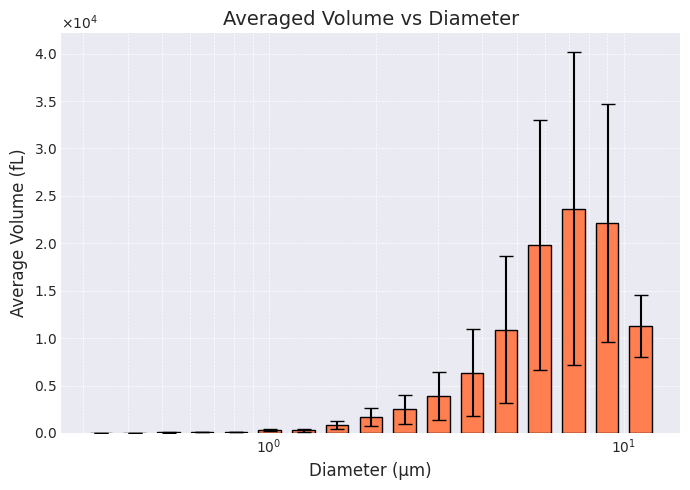

In [71]:
from tsitools import ParticleData
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

# Apply seaborn style
sns.set_style('darkgrid')

# Read the data
data1 = ParticleData(directory='./', suffix='123', oversize_bin_cutoff=12.4)
data2 = ParticleData(directory='./', suffix='124', oversize_bin_cutoff=12.4)
data3 = ParticleData(directory='./', suffix='125', oversize_bin_cutoff=12.4)

# Stack the arrays along a new dimension
stacked_sums = np.stack((data1.sum_volumes, data2.sum_volumes, data3.sum_volumes), axis=0)

# Calculate the mean along the new dimension
average_sums = np.mean(stacked_sums, axis=0)

# Calculate the standard deviation along the new dimension
std_sums = np.std(stacked_sums, axis=0)

# Convert the width from log scale to linear scale for each bar center
widths = data1.calculate_bar_plot_widths(log_base=10, bar_width=0.25)

# Enhance the plot with additional styling
plt.figure(figsize=(7, 5))

# Create a bar plot with adjusted widths and error bars
bars = plt.bar(
    data1.mean_diameters,
    average_sums,
    width=widths,
    align='center',
    yerr=std_sums,
    capsize=5,
    color='coral',
    edgecolor='black',
    linewidth=1
)

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Use scientific notation for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Customize axes and title
plt.xscale('log')
plt.xlabel('Diameter (μm)', fontsize=12)
plt.ylabel('Average Volume (fL)', fontsize=12)
plt.title('Averaged Volume vs Diameter', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


### Counts Over Time

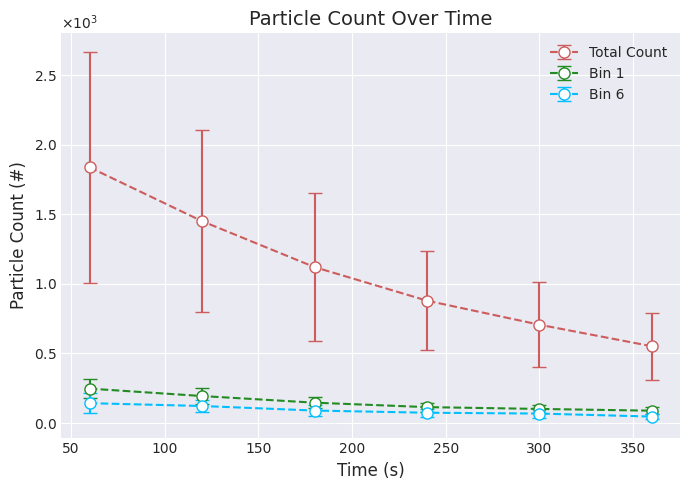

In [73]:
from tsitools import ParticleData
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

colors = ['indianred', 'forestgreen', 'deepskyblue']

# Extract the time points from one of the files
time_points = ParticleData(directory='./', suffix='123').time_points

# Read the data collected over 6 minutes in 1 minute intervals
data1 = ParticleData(directory='./', suffix='123')
data2 = ParticleData(directory='./', suffix='124')
data3 = ParticleData(directory='./', suffix='125')

count_over_time1 = data1.get_count_over_time()
count_over_time2 = data2.get_count_over_time()
count_over_time3 = data3.get_count_over_time()

# Stack the arrays along a new dimension and obtain average and standard deviation
stacked_total = np.stack((count_over_time1, count_over_time2, count_over_time3), axis=0)
average_total = np.mean(stacked_total, axis=0)
std_total = np.std(stacked_total, axis=0)

# bin numbers start from 0 so bin_num = 0 means the first bin
count_bin1_1 = data1.get_count_over_time(bin_num=0)
count_bin1_2 = data2.get_count_over_time(bin_num=0)
count_bin1_3 = data3.get_count_over_time(bin_num=0)

# Stack the arrays along a new dimension and obtain average and standard deviation
stacked_bin1 = np.stack((count_bin1_1, count_bin1_2, count_bin1_3), axis=0)
average_bin1 = np.mean(stacked_bin1, axis=0)
std_bin1 = np.std(stacked_bin1, axis=0)

# bin numbers start from 0 so bin_num = 5 means the sixth bin
count_bin6_1 = data1.get_count_over_time(bin_num=5)
count_bin6_2 = data2.get_count_over_time(bin_num=5)
count_bin6_3 = data3.get_count_over_time(bin_num=5)

# Stack the arrays along a new dimension and obtain average and standard deviation
stacked_bin6 = np.stack((count_bin6_1, count_bin6_2, count_bin6_3), axis=0)
average_bin6 = np.mean(stacked_bin6, axis=0)
std_bin6 = np.std(stacked_bin6, axis=0)

# Plot counts over time for all bins combined as well as bins 1 and 6
plt.figure(figsize=(7, 5))
plt.errorbar(time_points, average_total, yerr=std_total, fmt='o--', markerfacecolor='white', markersize=8, color=colors[0], label='Total Count', capsize=5)
plt.errorbar(time_points, average_bin1, yerr=std_bin1, fmt='o--', markerfacecolor='white', markersize=8, color=colors[1], label='Bin 1', capsize=5)
plt.errorbar(time_points, average_bin6, yerr=std_bin6, fmt='o--', markerfacecolor='white', markersize=8, color=colors[2], label='Bin 6', capsize=5)

# Use scientific notation for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Particle Count (#)', fontsize=12)
plt.title('Particle Count Over Time', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
